# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Não foram localizados dados nulos e há apenas dados inteiros. Não sendo necessária a tratativa de dados faltantes. 

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [56]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


**Valor_Aluguel**  
Valor da média e o 50% são diferentes, mínimo está muito abaixo do máximo. Valor do desvio padrão está muito próximo a média. Esses são indícios da presença de ouliers.
  
**Valor_Condominio**  
Valor da média está acima do valor do 50%, grande diferença entre min e max. O valor mínimo igual a zero pode representar imóveis sem cobrança de condomínio (como casas), mas também pode indicar inconsistências nos dados, sendo necessária validação adicional. 
  
**Metragem**  
Há uma diferença entre os valores de média e o 50%, mínimo e máximo possuem grande diferença de valores entre si, podendo indicar a presença de outliers nessa variável. 

### Outliers da variável Valor Aluguel

<Axes: xlabel='Valor_Aluguel', ylabel='Count'>

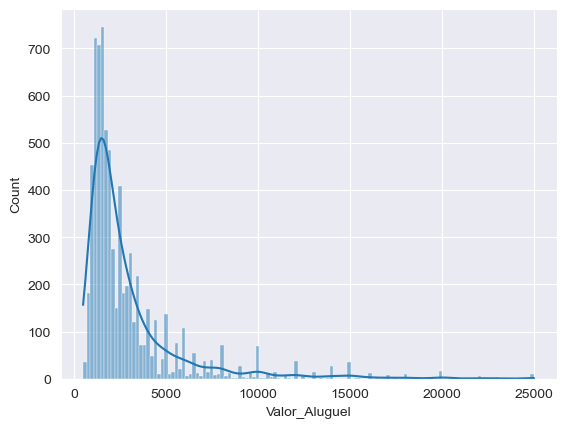

In [57]:
sns.histplot(data=df, x = 'Valor_Aluguel', kde=True)

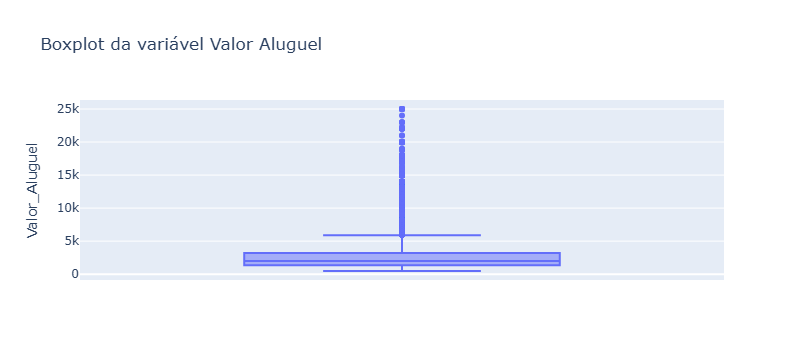

In [58]:
sns.set_style('darkgrid')

fig = px.box(df, y='Valor_Aluguel', title='Boxplot da variável Valor Aluguel')
fig.show()

In [59]:
df[df['Valor_Aluguel'] > 5900]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6454,5990,1188,164,3,5,3,3
6455,5999,1400,175,4,4,1,2
6456,6000,800,150,3,4,3,2
6457,6000,0,152,2,2,1,1
6458,6000,1100,43,1,2,1,1
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [60]:
print('Porcentagem de registros em Valor_Aluguel > 5900: ',
    (len(df[df['Valor_Aluguel'] > 5900]) / len(df)) * 100)

Porcentagem de registros em Valor_Aluguel > 5900:  10.398445092322643


In [61]:
Q1 = df['Valor_Aluguel'].quantile(0.25)
Q3 = df['Valor_Aluguel'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df['Valor_Aluguel_cap'] = df['Valor_Aluguel'].clip(upper=limite_superior)

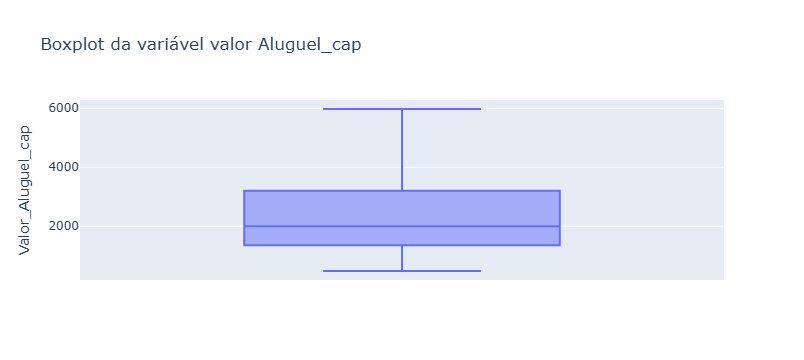

In [62]:
sns.set_style('darkgrid')

fig = px.box(df, y='Valor_Aluguel_cap', title='Boxplot da variável valor Aluguel_cap')
fig.show()

Para a variável *Valor_Aluguel* os outliera representavam um valor superior a 10% dos dados. Nesse caso, remove-los não seria a melhor opção.  

Tentei tratar os outliers substituindo os valores utilizando IQR, limite_inferior e limite_superior, contudo, ainda se mantinha a presença de outliers e o resultado final de R quadradodo modelo de regressão multipla não foi satisfatório. Nesse caso, pesquisei outro método para tratar os outliers e acabei adotando o capping - ou winsorização.   
Essa nova forma de tratar os dados deixou a variável com uma distribuição mais próxima a normal. 

### Outliers da variável Valor Condominio

In [63]:
df[df['Valor_Condominio'] == 0]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_cap
1,500,0,50,1,2,1,1,500
2,500,0,40,1,2,1,1,500
4,500,0,30,1,1,0,0,500
10,600,0,90,1,2,1,1,600
22,650,0,40,1,2,1,1,650
...,...,...,...,...,...,...,...,...
7096,15000,0,265,4,2,1,1,5975
7097,15000,0,320,4,4,3,3,5975
7147,17000,0,264,3,4,3,5,5975
7173,20000,0,469,4,5,4,4,5975


In [64]:
(len(df[df['Valor_Condominio'] == 0]) / len(df)) * 100

8.8574205192281

In [65]:
df['Possui_Condominio'] = df['Valor_Condominio'] > 0

In [66]:
df['Possui_Condominio']

0        True
1       False
2       False
3        True
4       False
        ...  
7198     True
7199     True
7200     True
7201     True
7202     True
Name: Possui_Condominio, Length: 7203, dtype: bool

In [67]:
Q1 = df['Valor_Condominio'].quantile(0.25)
Q3 = df['Valor_Condominio'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['Valor_Condominio'] >= limite_inferior) & (df['Valor_Condominio'] <= limite_superior)]

mediana_sem_outliers = df_sem_outliers['Valor_Condominio'].median()

df.loc[df['Valor_Condominio'] > 1854, 'Valor_Condominio'] = mediana_sem_outliers

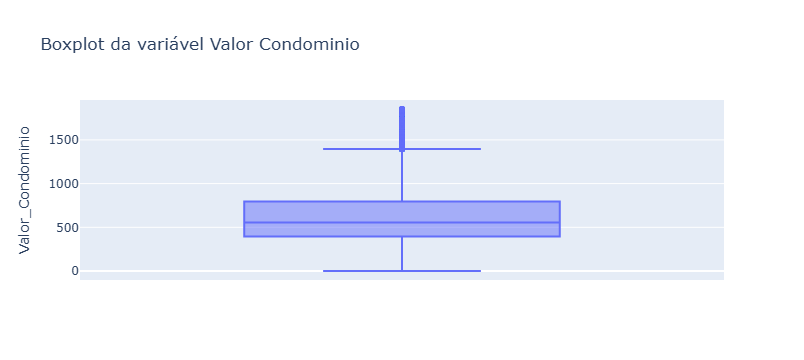

In [68]:
sns.set_style('darkgrid')

fig = px.box(df, y='Valor_Condominio', title='Boxplot da variável Valor Condominio')
fig.show()

In [70]:
print('Porcentagem de registros em Valor_Condominio > 1854: ',
    (len(df[df['Valor_Condominio'] > 1395]) / len(df)) * 100)

Porcentagem de registros em Valor_Condominio > 1854:  7.052616965153407


### Outliers da variável Metragem

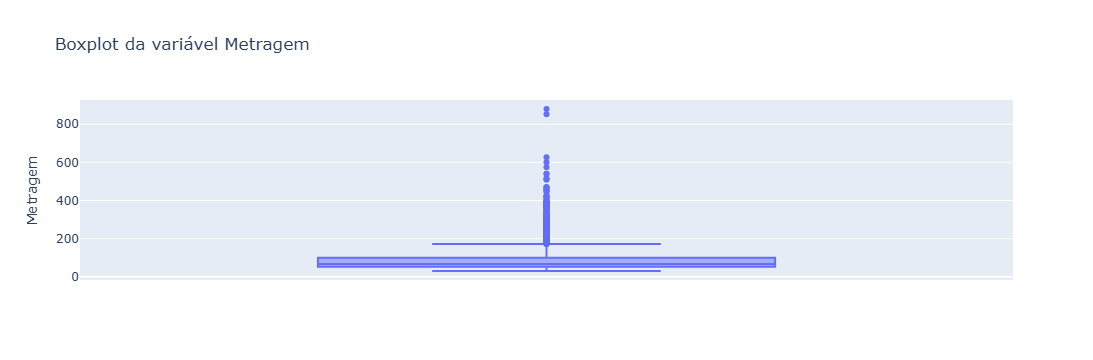

In [71]:
sns.set_style('darkgrid')

fig = px.box(df, y='Metragem', title='Boxplot da variável Metragem')
fig.show()

In [120]:
df[df['Metragem'] > 172]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log
1649,1300,631.0,208,4,3,2,3,7.170888
2156,1500,631.0,230,3,2,1,2,7.313887
2492,1500,631.0,230,3,2,1,2,7.313887
2989,1700,631.0,250,3,2,1,0,7.438972
3525,1900,631.0,225,4,2,1,3,7.550135
...,...,...,...,...,...,...,...,...
7198,25000,631.0,627,4,5,4,6,10.126671
7199,25000,631.0,364,4,2,1,0,10.126671
7200,25000,631.0,266,3,4,3,7,10.126671
7201,25000,631.0,600,4,5,4,8,10.126671


In [72]:
print('Porcentagem de registros em Metragem > 172: ',
    (len(df[df['Metragem'] > 172]) / len(df)) * 100)

Porcentagem de registros em Metragem > 172:  8.982368457587118


In [73]:
df['Metragem_log'] = np.log1p(df['Metragem'])

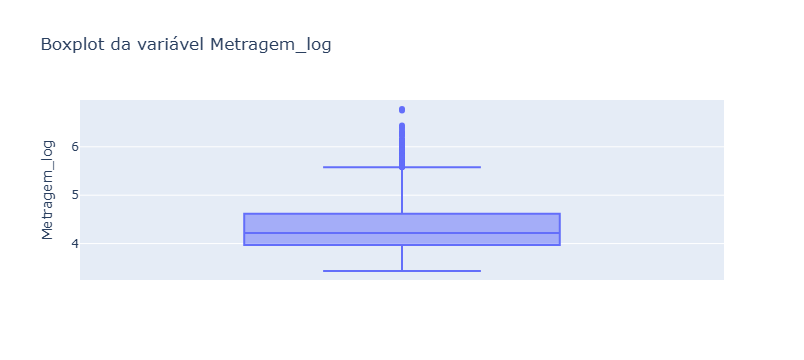

In [74]:
sns.set_style('darkgrid')

fig = px.box(df, y='Metragem_log', title='Boxplot da variável Metragem_log')
fig.show()

Todas as três variáveis identificadas apresentaram presença de outliers, os quais foram tratados sem remoção, uma vez que representavam uma parcela significativa dos dados — chegando a aproximadamente 10% do dataset em um dos casos.  
  
Para a variável **Valor_Aluguel**, foi utilizado o método de capping, o que permitiu reduzir a influência dos valores extremos e obter uma distribuição mais próxima da normal.  
  
Na variável **Valor_Condominio**, optou-se pela aplicação do método IQR, substituindo os valores considerados outliers. Após o tratamento, foi gerado um boxplot, no qual ainda é possível observar a presença de novos outliers, no entanto, esses valores foram mantidos para posterior análise de seu impacto no desempenho do modelo. Além disso, foi criada uma variável auxiliar que identifica se o imóvel possui ou não valor de condomínio associado.  
  
Por fim, a variável **Metragem** foi tratada por meio de uma transformação logarítmica, permitindo a compactação dos valores e a redução do impacto dos outliers no processo de modelagem.

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Possui_Condominio_encoded'] = le.fit_transform(df['Possui_Condominio'])

In [77]:
df=df.drop(['Possui_Condominio'], axis=1)

In [78]:
df.head(15)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_cap,Metragem_log,Possui_Condominio_encoded
0,480,295,48,2,2,1,1,480,3.891820,1
1,500,0,50,1,2,1,1,500,3.931826,0
2,500,0,40,1,2,1,1,500,3.713572,0
3,500,36,45,1,2,1,0,500,3.828641,1
4,500,0,30,1,1,0,0,500,3.433987,0
5,500,380,66,2,1,0,1,500,4.204693,1
6,550,100,48,2,2,1,1,550,3.891820,1
7,600,110,46,2,2,1,1,600,3.850148,1
8,600,100,49,2,2,1,1,600,3.912023,1
9,600,325,50,2,2,1,1,600,3.931826,1


### Análise Bivariada  

In [ ]:
Perguntas de negócio a serem respondidas:
- Valor_Condominio influencia na variável Valor_Aluguel?
- N_quartos possui relação com a metragem?
- Possui_condominio influencia o Valor_Aluguel?
- Metragem influencia o Valor_Aluguel?
- N_Vagas possui relação com Valor_Aluguel?

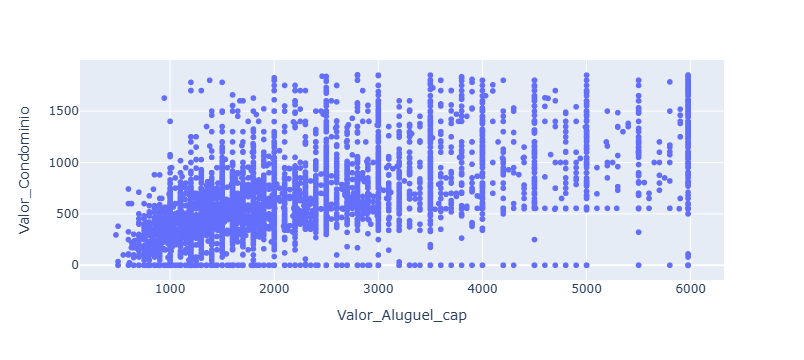

<Figure size 800x600 with 0 Axes>

In [82]:
plt.figure(figsize=(8, 6))
fig = px.scatter(df, x='Valor_Aluguel_cap', y='Valor_Condominio')
fig.show()

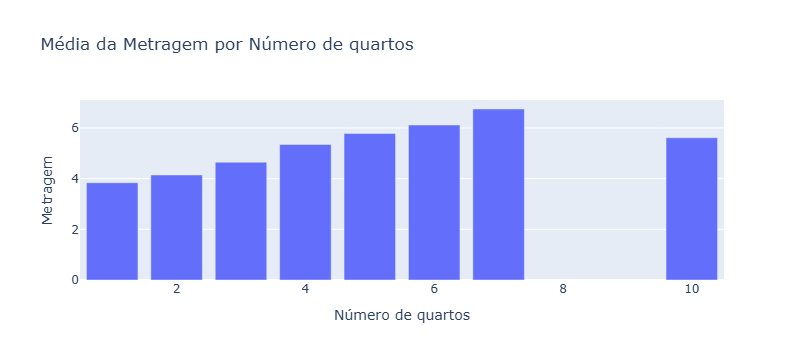

In [114]:
media_metragem_por_quartos = df.groupby('N_Quartos')['Metragem_log'].mean().reset_index()

fig = px.bar(media_metragem_por_quartos, x='N_Quartos', y = 'Metragem_log',
             title='Média da Metragem por Número de quartos',
             labels = {'N_Quartos' : 'Número de quartos', 'Metragem_log' : 'Metragem'})
fig.show()

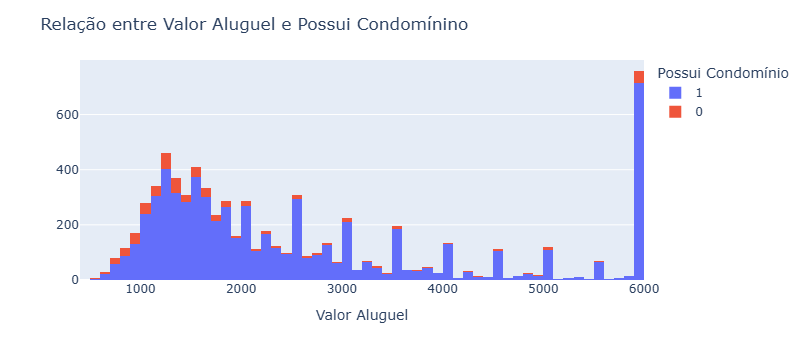

In [116]:
fig = px.histogram(df, x='Valor_Aluguel_cap', color='Possui_Condominio_encoded', barmode='stack')

fig.update_layout(title='Relação entre Valor Aluguel e Possui Condomínino',
                  xaxis_title= 'Valor Aluguel',
                  yaxis_title= '',
                  legend_title= 'Possui Condomínio')
fig.show()

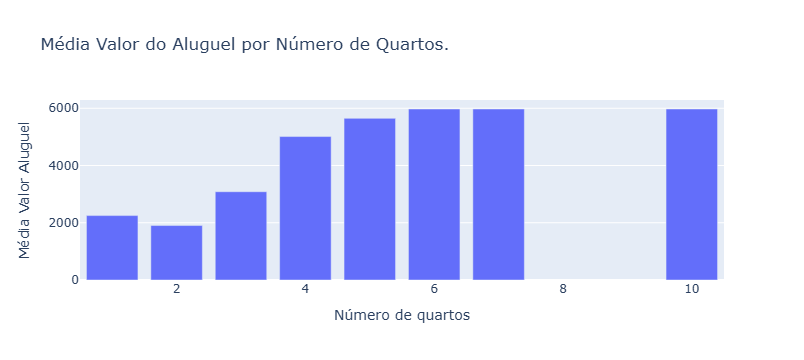

In [101]:
media_aluguel_por_quartos = df.groupby('N_Quartos')['Valor_Aluguel_cap'].mean().reset_index()

fig = px.bar(media_aluguel_por_quartos, x='N_Quartos', y = 'Valor_Aluguel_cap',
             title='Média Valor do Aluguel por Número de Quartos.',
             labels = {'N_Quartos' : 'Número de quartos', 'Valor_Aluguel_cap' : 'Média Valor Aluguel'})
fig.show()

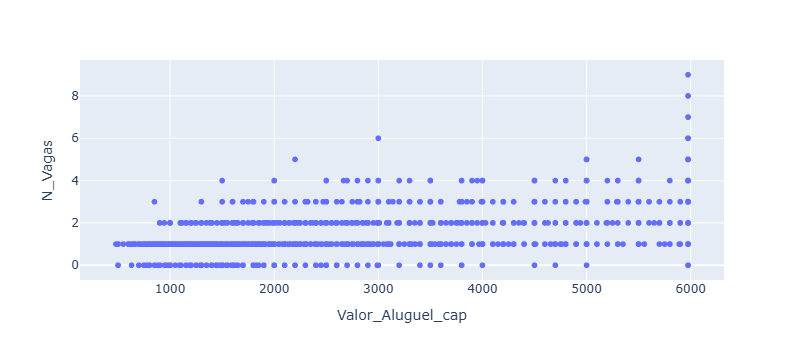

<Figure size 800x600 with 0 Axes>

In [119]:
plt.figure(figsize=(8, 6))
fig = px.scatter(df, x='Valor_Aluguel_cap', y='N_Vagas')
fig.show()

Observa-se a tendência de quanto maior o valor do condominio, maior será o valor do aluguel. Contudo, há alguns casos em que o condominio é igual a 0, mesmo o valor do aluguel sendo alto, isso pode ocorrer nos casos de edificações em que não há cobrança de condominio, como em casas.   

Ao conferirmos a relação entre a média da metragem do imóvel e o número de quartos, verificamos que conforme o número de quartos aumenta a metragem tende a aumentar também.  

Na relação **Possui_Condominio** X **Valor_Aluguel_cap** conferimos que a maior parte dos imóveis possui condomínio e apenas uma pequena parcela não possui. Como no caso dos imóveis com valor de aluguel entre 5900 - 6000, desses 716 possuem condomínio e apenas 42 não possuem.  

Em **Média Valor do Aluguel por Número de Quartos** verifica-se que quanto maior o número de quartos o imóvel possui maior tende a ser o valor do aluguel.  

Conferindo a relação **Valor Aluguel** e **Número de Vagas** temos que a maior parte dos valores de aluguéis que possuem até 4 vagas, sendo poucos com número superior a isso. 

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




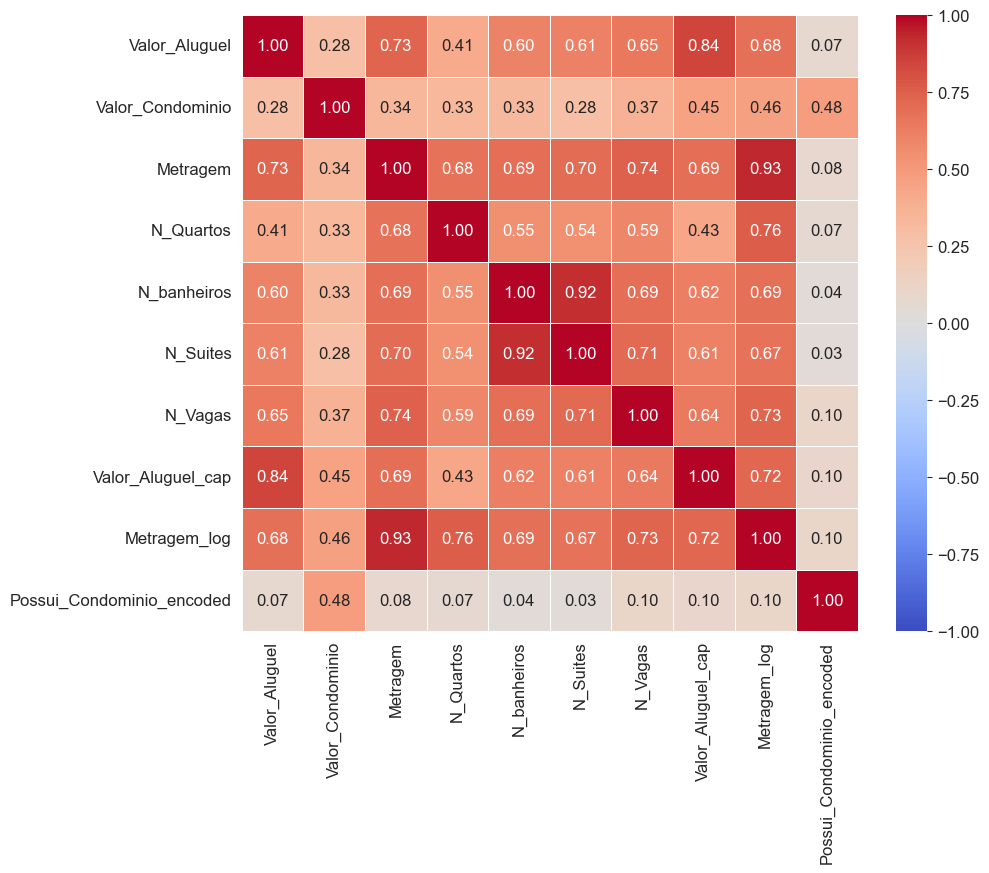

In [120]:
corr = df.corr()

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

Variáveis que possuem correlações mais fortes com a variável **Valor_Aluguel_cap**:  
- N_Suites
- N_banheiros
- Valor_Condominio
- Metragem_log

Conferimos que a variável Possui_Condiminio_encoded possui baixa correção com as demais variáveis. 

In [176]:
df1 =df.drop(columns =['Metragem', 'Valor_Aluguel', 'Possui_Condominio_encoded'])

In [177]:
df1.head()

,Valor_Condominio,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_cap,Metragem_log
0,295,2,2,1,1,480,3.891820
1,0,1,2,1,1,500,3.931826
2,0,1,2,1,1,500,3.713572
3,36,1,2,1,0,500,3.828641
4,0,1,1,0,0,500,3.433987


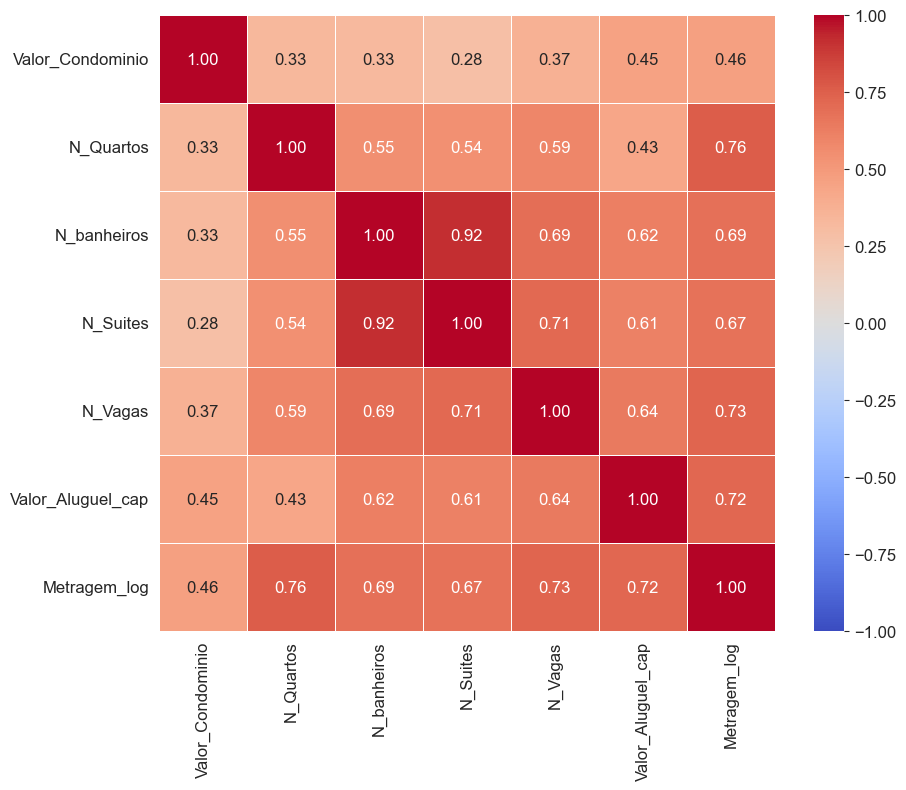

In [178]:
corr1 = df1.corr()

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr1, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [179]:
x1 = df1.drop('Valor_Aluguel_cap', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y1 = df1['Valor_Aluguel_cap'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [180]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

In [181]:
print('Tamanho do x1_train:', x1_train.shape)

Tamanho do x1_train: (5402, 6)


In [182]:
print('Tamanho do y1_train:', y1_train.shape)

Tamanho do y1_train: (5402,)


In [183]:
print('Tamanho do x1_test:', x1_test.shape)

Tamanho do x1_test: (1801, 6)


In [184]:
print('Tamanho do y1_test:', y1_test.shape)

Tamanho do y1_test: (1801,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [185]:
x1 = x1_train[['Metragem_log']]  # Variável independente (características)
y1 = y1_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [186]:
x1

,Metragem_log
6931,5.176150
4125,4.262680
6079,4.204693
5044,4.234107
2299,3.526361
...,...
3772,3.891820
5191,3.555348
5226,4.564348
5390,4.317488


In [187]:
regressao_valor_aluguel = LinearRegression()

regressao_valor_aluguel.fit(x1, y1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [188]:
regressao_valor_aluguel.intercept_

np.float64(-7098.32688328183)

In [189]:
regressao_valor_aluguel.coef_

array([2223.82511141])

Nossa equação seria:  **Valor_Aluguel** = -7098.32*(Metragem) + 2223.82

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [190]:
regressao_valor_aluguel.score(x1, y1)

0.5143872847139261

O resultado de R2 foi 0.51, isso significa uma proporção baixa da variância em **Valor_Aluguel** que é previsível a partir da variável **Metragem**. Sendo assim, há  uma boa correlação entre a variável target e a independente.  
  
Nesse caso, a variável **Metragem** é capaz de explicar apenas 51% do valor de aluguel. 

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

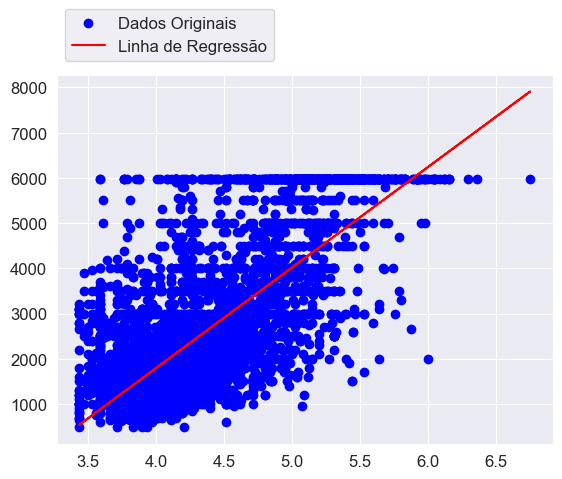

In [191]:
plt.scatter(x1, y1, color = 'blue', label = 'Dados Originais')

plt.plot(x1, regressao_valor_aluguel.predict(x1), color = 'red', label = 'Linha de Regressão')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2))
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [192]:
x1_test = x1_test[['Metragem_log']]  # Variável independente (características)
y1_test = y1_test  # Variável dependente (rótulo)

In [193]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_valor_aluguel.predict(x1_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valor_aluguel.score(x1_test, y1_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5370816742338731


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Os resultados do R2 das bases de treino e teste foram próximos, sendo 51% e 53%, respectivamente. Isso pode significar que o modelo conseguiu se adaptar bem a dados novos e não sofre de overfitting.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [194]:
x_multipla = df1.drop('Valor_Aluguel_cap', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y_multipla = df1['Valor_Aluguel_cap'] #Separando Y (Apenas variavel valor_aluguel)

In [195]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_multipla, y_multipla, test_size=0.25, random_state=42)

In [196]:
print('Tamanho do x2_train:', x1_train.shape)

Tamanho do x2_train: (5402, 6)


In [197]:
print('Tamanho do y2_train:', y1_train.shape)

Tamanho do y2_train: (5402,)


In [198]:
print('Tamanho do x2_test:', x1_test.shape)

Tamanho do x2_test: (1801, 1)


In [199]:
print('Tamanho do y2_test:', y1_test.shape)

Tamanho do y2_test: (1801,)


In [200]:
x_multipla = x2_train[['Valor_Condominio', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas', 'Metragem_log',]] 
y_multipla = y2_train

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [201]:
x_multipla

,Valor_Condominio,N_Quartos,N_banheiros,N_Suites,N_Vagas,Metragem_log
6931,1350,3,4,3,3,5.176150
4125,680,1,1,0,2,4.262680
6079,650,2,1,0,1,4.204693
5044,655,3,2,1,1,4.234107
2299,330,1,1,0,1,3.526361
...,...,...,...,...,...,...
3772,450,2,2,1,1,3.891820
5191,570,1,1,0,1,3.555348
5226,976,2,2,1,1,4.564348
5390,550,3,3,1,2,4.317488


In [202]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(x_multipla, y_multipla)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [203]:
regressao_multipla.intercept_

np.float64(-5735.013953254622)

In [204]:
regressao_multipla.coef_

array([ 5.47243142e-01, -5.92521340e+02,  1.78296567e+02,  1.46626326e+02,
        3.41789701e+02,  1.91064107e+03])

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [205]:
regressao_multipla.score(x_multipla, y_multipla)

0.6155337644110523

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [206]:
X_test_multipla = x2_test[['Valor_Condominio', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas', 'Metragem_log']]
y_test_multipla = y2_test

In [207]:
previsoes_multipla = regressao_multipla.predict(X_test_multipla)

In [208]:
r2 = regressao_multipla.score(X_test_multipla, y_test_multipla)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.6169614199781798


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

O R quadrado da regressão linear alcançou o valor de 0.53 quando rodamos a base teste, já o modelo de regressão múltipla alcançou o valor de 0.61. Num primeiro momento pode parecer que o modelo de regressão multipla alcançou resultados melhores, contudo, o score entre a base de treino e teste foi quase identico, significando overfitting do modelo. 